- _İlk olarak, Sıcaklık verilerini Kaggle'dan indirin._
- _Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?_
- _Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız._

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [10]:
Y = df['Temperature (C)'] - df['Apparent Temperature (C)']
X = df[['Humidity', 'Wind Speed (km/h)']]

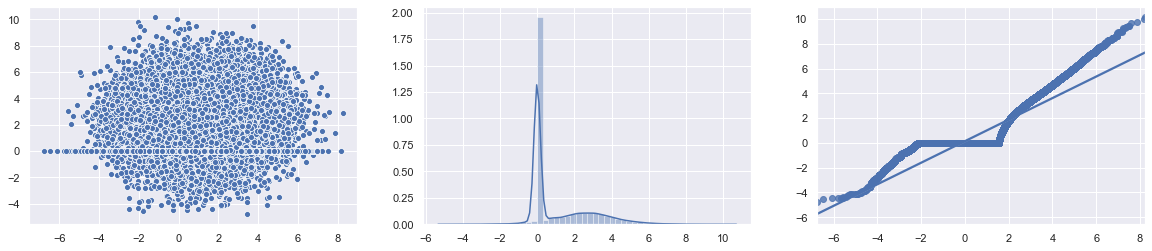

In [20]:
randomNum = np.random.normal(np.mean(Y), np.std(Y), len(Y))

plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=randomNum, y=Y)
plt.subplot(1, 3, 2)
sns.distplot(Y)
plt.subplot(1, 3, 3)
sns.regplot(np.sort(randomNum), np.sort(Y))
plt.show()

In [11]:
model = LinearRegression().fit(X, Y)

In [12]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:38:42   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df['HumidityWind'] = df['Humidity'] * df['Wind Speed (km/h)']
Y2 = df['Temperature (C)'] - df['Apparent Temperature (C)']
X2 = df[['Humidity', 'Wind Speed (km/h)', 'HumidityWind']]

In [18]:
model = LinearRegression().fit(X2, Y2)

In [19]:
X2 = sm.add_constant(X2)
results = sm.OLS(Y2, X2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        01:39:19   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity             -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)    -0.0905      0.002    -36.797      0.000      -0.095      -0.086
HumidityWind          0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Özelliklerin p-değeri < 0.05 olduğundan dolayı hedef üzerinde istatistiksel olarak anlamlıdır.
- Çarpıklık (skew) pozitif olduğundan dolayı hedef ile ilişki pozitif anlamlıdır. ?
- R-sq. değeri düşük görünüyor, 1e yaklaşması modelin daha anlamlı olduğunu ifade eder. ?
- Yeni özelliğin eklenmesiyle R-sq. değerimizde artış gözlemlendi. Modelin daha anlamlı hale geldiğini gösterir, ama yeterli bir artış değildir.
- Yeni özelliğin eklenmesiyle const değeri 0'a yaklaşıyor, bu yaklaşım modelin daha anlamlı olduğunu ifade eder.